# Time Series Exercise 1

->  Given the following dataset, perform the first three steps mentioned while dealing with time-series data.  Assume that you would be working towards predicting the no. of trips in the month of June. 

In [2]:
# Load in libraries, visualization, statistical and ML modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import scipy.stats 

# Load in Data

In [5]:
trips = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/wiki_machine_learning.csv', sep=' ')
trips

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
...,...,...,...,...,...,...,...
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning


In [6]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 81 to 372
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    384 non-null    object
 1   count   384 non-null    int64 
 2   lang    384 non-null    object
 3   page    384 non-null    object
 4   rank    384 non-null    int64 
 5   month   384 non-null    int64 
 6   title   384 non-null    object
dtypes: int64(3), object(4)
memory usage: 24.0+ KB


# data Cleaning

In [7]:
# Data Types

# 1. Date column to datetime from string/object

trips['date'] = pd.to_datetime(trips['date'])

In [8]:
trips.dtypes

date     datetime64[ns]
count             int64
lang             object
page             object
rank              int64
month             int64
title            object
dtype: object

In [9]:
trips.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [10]:
# as its a time series dataframe, its the most important field, and the rest will stay as they are

In [11]:
# new column with months only

trips['month'] = trips['date'].dt.month
trips

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,1,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,1,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,1,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,1,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,1,Machine_learning
...,...,...,...,...,...,...,...
382,2016-01-16,1644,en,Machine_learning,8708,1,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,1,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,1,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,1,Machine_learning


In [14]:
# Print out only trips that happened in june

trips[trips['month'] == 6]

,date,count,lang,page,rank,month,title
233,2015-06-01,2713,en,Machine_learning,8708,6,Machine_learning
230,2015-06-02,2808,en,Machine_learning,8708,6,Machine_learning
231,2015-06-03,2720,en,Machine_learning,8708,6,Machine_learning
227,2015-06-04,2742,en,Machine_learning,8708,6,Machine_learning
237,2015-06-05,2467,en,Machine_learning,8708,6,Machine_learning
225,2015-06-06,1582,en,Machine_learning,8708,6,Machine_learning
226,2015-06-07,1697,en,Machine_learning,8708,6,Machine_learning
238,2015-06-08,2703,en,Machine_learning,8708,6,Machine_learning
239,2015-06-09,2765,en,Machine_learning,8708,6,Machine_learning
217,2015-06-10,2833,en,Machine_learning,8708,6,Machine_learning


In [15]:
# new clean dataframe with only important columns

trips = trips[['date', 'count', 'month']]

In [20]:
trips

,date,count,month
81,2015-01-01,1414,1
80,2015-01-02,1920,1
79,2015-01-03,1338,1
78,2015-01-04,1404,1
77,2015-01-05,2264,1
...,...,...,...
382,2016-01-16,1644,1
381,2016-01-17,1836,1
376,2016-01-18,2983,1
375,2016-01-19,3389,1


In [21]:
# Check for any null values or duplicates

trips.isna().sum()

date     0
count    0
month    0
dtype: int64

In [23]:
# dups
trips.drop_duplicates().count()

date     384
count    384
month    384
dtype: int64

# Visualization

In [50]:
# New df with time as the index

trips_new = trips.set_index('date')
trips_new

,count,month
date,,
2015-01-01,1414,1
2015-01-02,1920,1
2015-01-03,1338,1
2015-01-04,1404,1
2015-01-05,2264,1
...,...,...
2016-01-16,1644,1
2016-01-17,1836,1
2016-01-18,2983,1


## 1. Line plot

In [34]:
# using seaborn
sns.set(rc={'figure.figsize':(11, 5)})

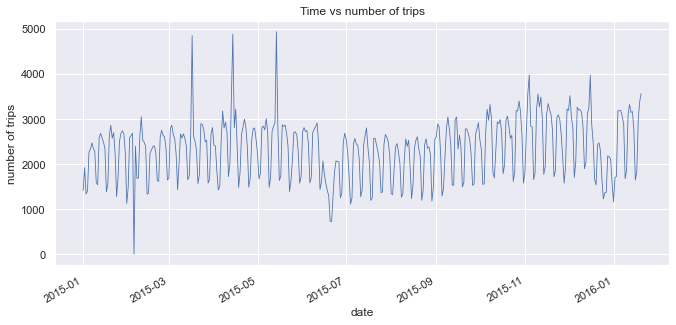

In [36]:
# Vizualizing the number of trips in a line graph

trips_new['count'].plot(linewidth=0.8)
plt.ylabel('number of trips')
plt.title('Time vs number of trips')
plt.show()

There is an observed trend/seasonality as every few days the number of trips increase and drop, throughout the year

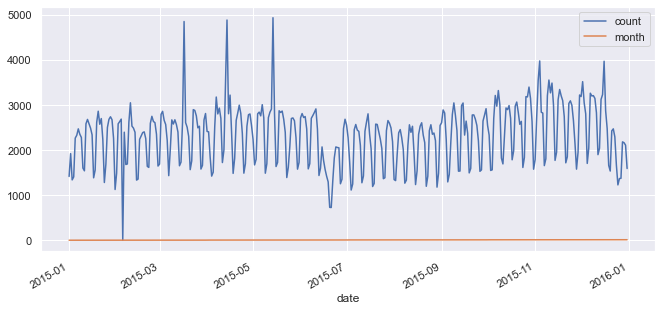

In [39]:
# Plotting for 2015 only
ax = trips_new.loc['2015'].plot()

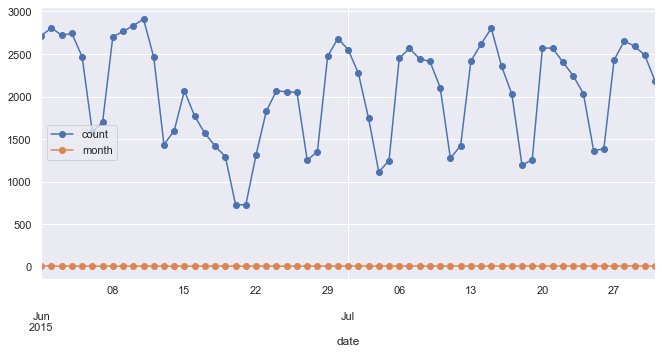

In [54]:
# Trips in june 2015 
ax = trips_new.loc['2015-06' : '2015-07'].plot(linestyle='-', marker='o')

## Bar graph

<AxesSubplot:xlabel='month'>

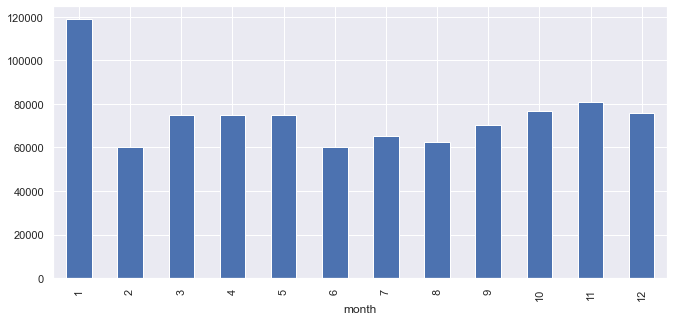

In [60]:
# bar charts by months
trips_new.groupby('month')['count'].sum().plot(kind='bar')

## Distribution

## Histogram

<AxesSubplot:>

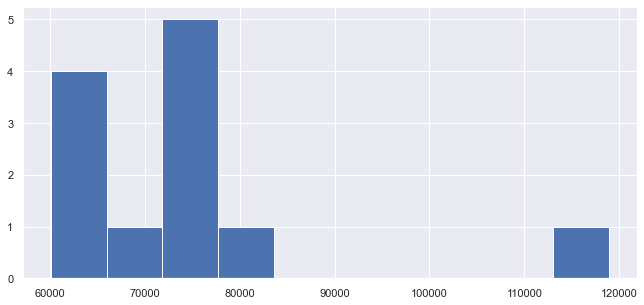

In [65]:
trips_new.groupby('month')['count'].sum().hist()

## Boxplots

<AxesSubplot:xlabel='month', ylabel='count'>

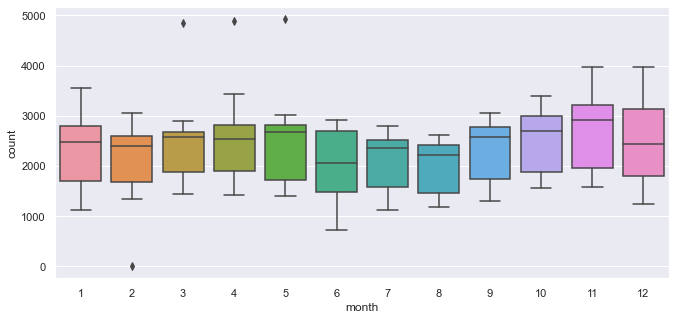

In [67]:
sns.boxplot(data=trips_new, x='month', y='count')

Most trips happen at the end of the year, and the least number of trips happen around july and august and around February